# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import tensorflow as tf
import pickle

training_file = '/input/train.p'
validation_file = '/input/valid.p'
testing_file = '/input/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of training examples
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

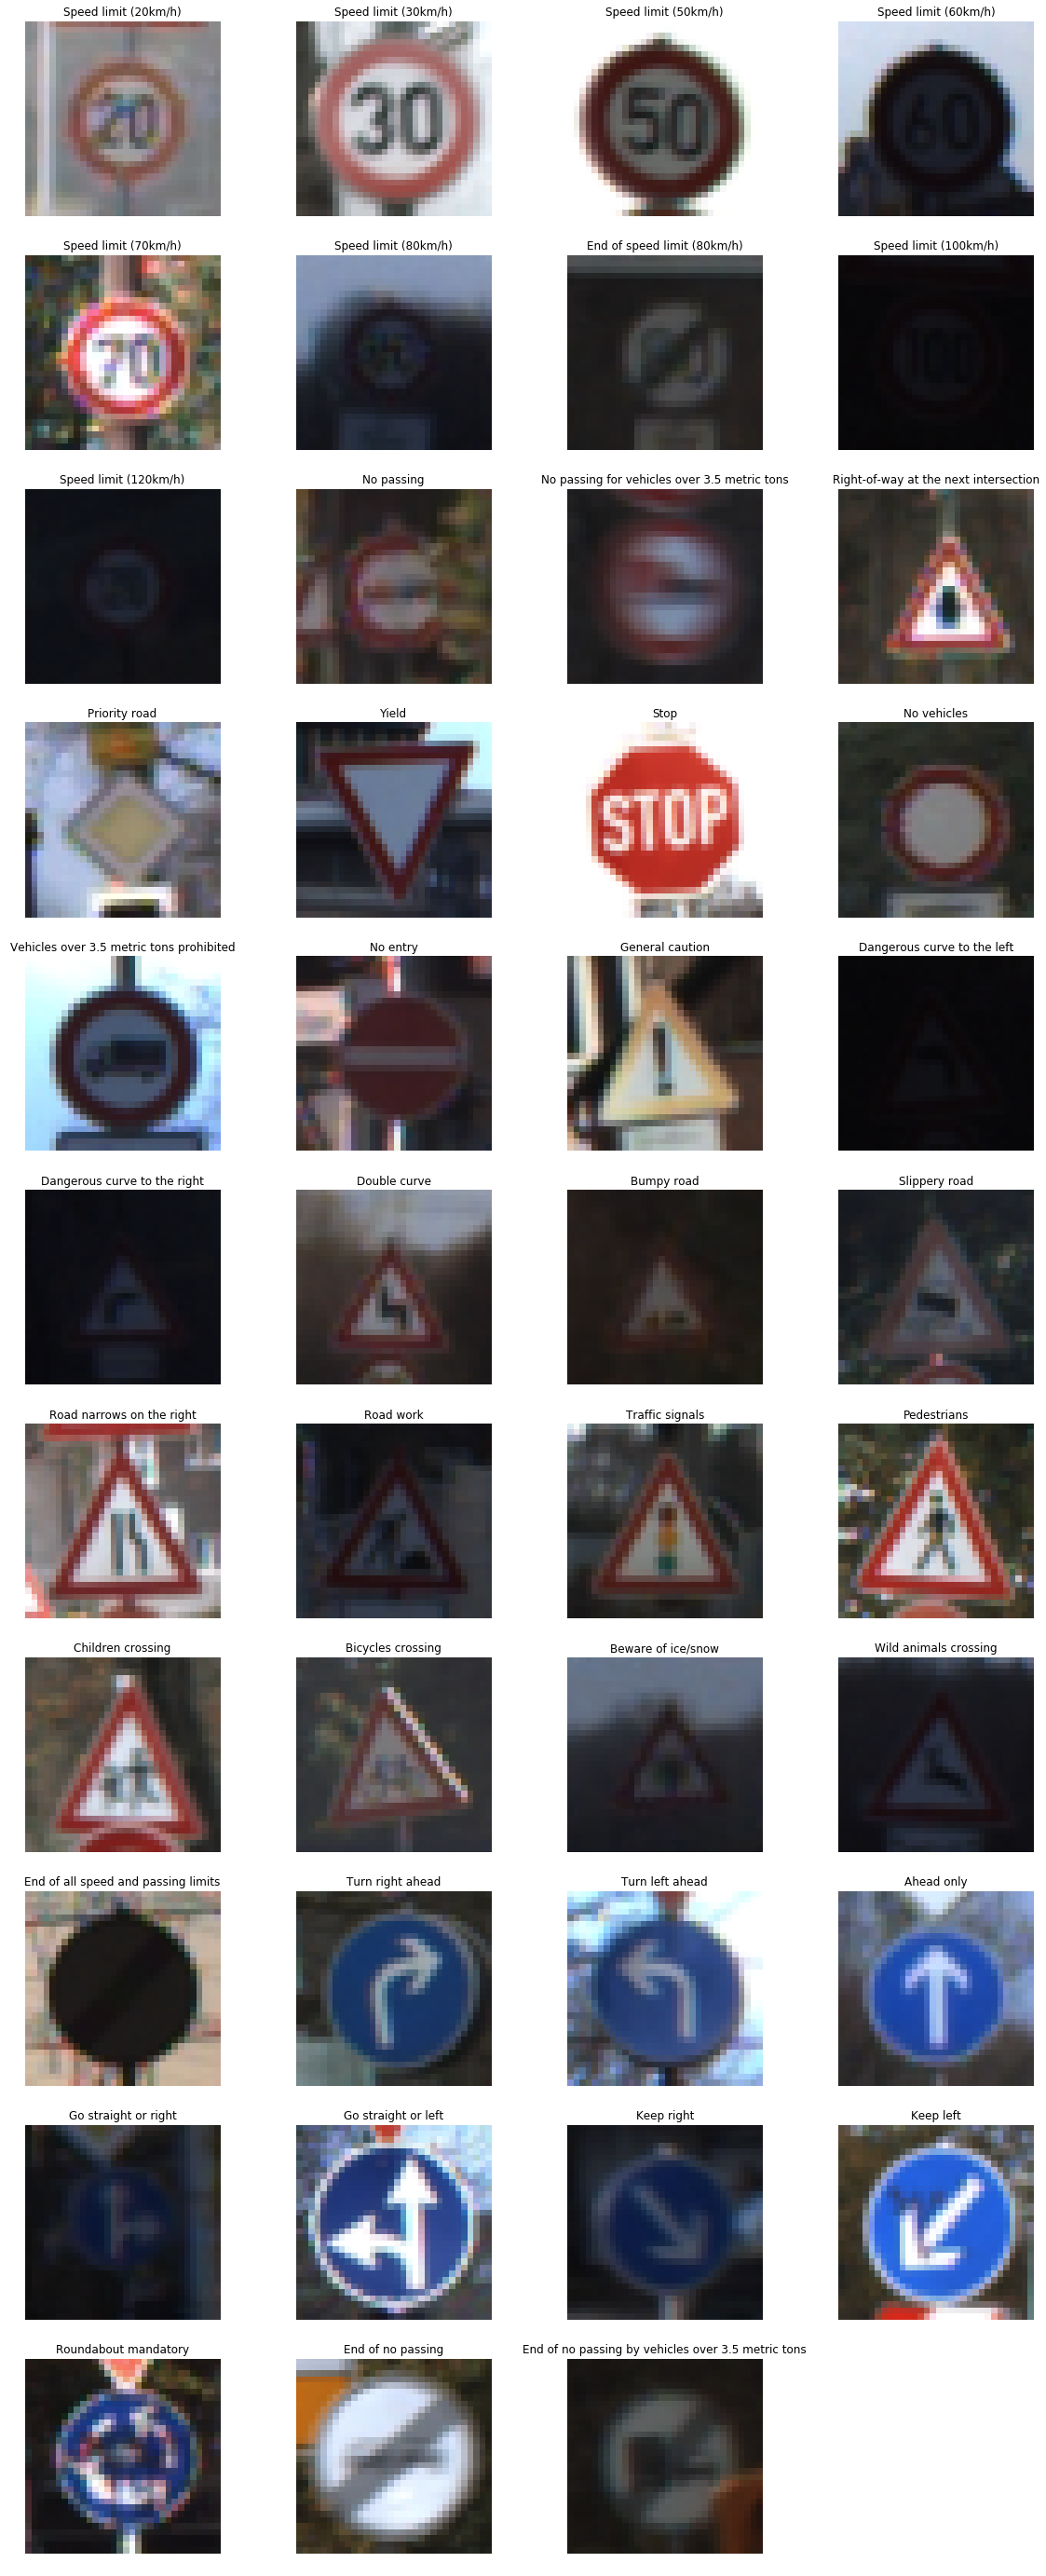

In [3]:
### Data exploration visualization code goes here.

import random
import itertools
import csv
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

signnames_file = 'signnames.csv'

signnames = {}

with open(signnames_file, newline='') as f:
    reader = csv.reader(f, delimiter=',', quoting=csv.QUOTE_NONE)
    next(reader, None)  # skip the headers
    for row in reader:
        signnames[int(row[0])] = row[1]

def group_images_by_sign(y_train):
    def sort_sign(index):
        return y_train[index]
    
    sorted_signs = sorted(range(len(y_train)), key=sort_sign)
    return {k: list(v) for k,v in itertools.groupby(sorted_signs, key=sort_sign)}


def display_rand_images_by_sign(X_train, y_train):
    images_by_sign = group_images_by_sign(y_train)
    fig = plt.figure(figsize=(20,50))
    count = 1
    for k, v in images_by_sign.items():
        index = random.randint(0, len(v)-1)
        image = X_train[v[index]].squeeze()
    
        a = fig.add_subplot(11, 4, count)
        a.set_title(signnames[k])
        plt.imshow(image, cmap="gray")
        plt.axis('off')
        count += 1

display_rand_images_by_sign(X_train, y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Number of training examples = 34799
Number of augmented training examples = 69598


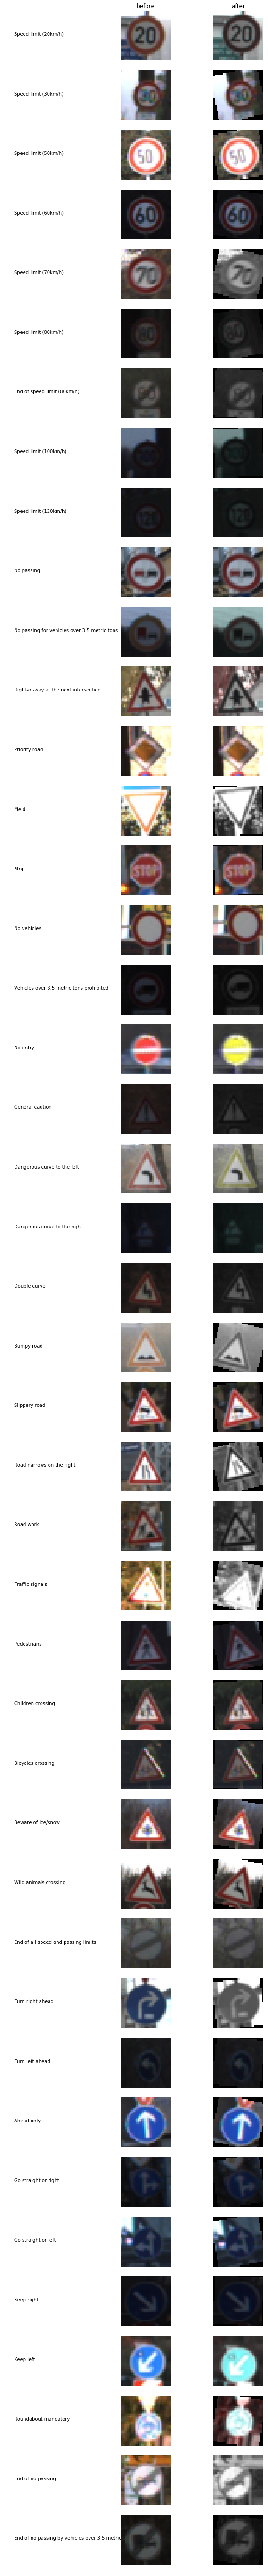

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.

import numpy as np    
from scipy.ndimage.interpolation import rotate, shift
from sklearn.utils import shuffle

# Data augmentation.
def data_augmentation(X_train, y_train):
    def _rotate(x, height, width):
        angle = random.randint(-15, 15)
        return rotate(x, angle, reshape=False)

    def _shift(x, height, width):
        s = np.random.randint(-3,3,3)
        return shift(x, s, order=3, mode='nearest')
    
    def _rotate_and_shift(x, height, width):
        return _rotate(_shift(x, height, width), height, width)
    
    distortion_fcts = (_rotate, _shift, _rotate_and_shift)
    
    new_imgs = []
    labels = []
    height, width, ch = X_train[0].shape
    
    for x, y in zip(X_train, y_train):
        index = random.randint(0, len(distortion_fcts)-1)
        distortion_fct = distortion_fcts[index]
        
        new_img = distortion_fct(x, height, width)
        new_imgs.append(new_img)
        labels.append(y)
        
    new_imgs = np.array(new_imgs)
    labels = np.array(labels)
    
    return new_imgs, labels

# Use tensorflow for the data augmentation
def apply_distortion_fct(X_train, y_train, distort_fct):
    with tf.Graph().as_default():
        input_queue = tf.train.slice_input_producer([X_train, y_train], num_epochs=1)
        distort_image = distort_fct(input_queue[0])
        
        X_result, y_result = [], []
    
        with tf.train.MonitoredTrainingSession(
            save_checkpoint_secs=None,
            save_summaries_steps=None,
            config=tf.ConfigProto(log_device_placement=False)) as mon_sess:
        
            while not mon_sess.should_stop():
                img, label = mon_sess.run([distort_image, input_queue[1]])
                X_result.append( img )
                y_result.append( label )
            
        return X_result, y_result

def data_augmentation_with_TF(X_train, y_train):
    def distort_input(input):
        distorted_image = tf.random_crop(input, [32, 32, 3])
        distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
        distorted_image = tf.image.random_contrast(distorted_image, lower=0.2, upper=1.8)
        return tf.image.per_image_standardization(distorted_image)
    
    return apply_distortion_fct(X_train, y_train, distort_input)

X_train_augm, y_train_augm = data_augmentation(X_train, y_train)

# Display some images distorted to increase the data set
def display_modified_images_by_sign(X, y, X_modified):
    images_by_sign = group_images_by_sign(y)
    fig = plt.figure(figsize=(10,300))
    count = 1
    nbcols = 3
    nbrows = len(images_by_sign)
    nbcells = nbcols * nbrows
    
    is_first = True
    
    for k, v in images_by_sign.items():
        index = random.randint(0, len(v)-1)
    
        orig_img = X[v[index]].squeeze()
        dist_img = X_modified[v[index]].squeeze()
        
        c = fig.add_subplot(nbcells, nbcols, count)
        c.text(0,0.5, signnames[k])
        plt.axis('off')
        count += 1
        
        a = fig.add_subplot(nbcells, nbcols, count)
        if is_first:
            a.set_title('before')
        
        plt.imshow(orig_img, cmap="gray")
        plt.axis('off')
        count += 1
        b = fig.add_subplot(nbcells, nbcols, count)
        if is_first:
            b.set_title('after')
            is_first = False
        
        plt.imshow(dist_img, cmap="gray")
        plt.axis('off')
        count += 1

def display_distorted_images_by_sign():
    return display_modified_images_by_sign(X_train, y_train, X_train_augm)
        
display_distorted_images_by_sign()

X_train_augm = np.concatenate((X_train, X_train_augm))
y_train_augm = np.concatenate((y_train, y_train_augm))

X_train, y_train = shuffle(X_train, y_train)
X_train_augm, y_train_augm = shuffle(X_train_augm, y_train_augm)

print("Number of training examples =", len(X_train))
print("Number of augmented training examples =", len(X_train_augm))

float64


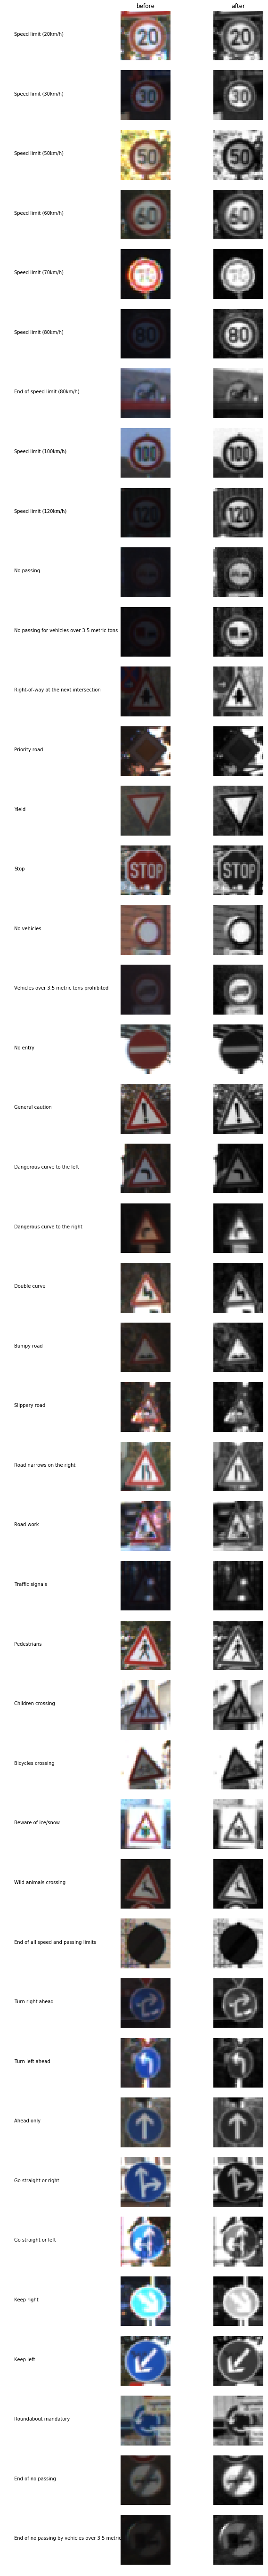

In [98]:
# Create a grayscale data set:

# As mentionned in the paper of Pierre Sermanet and Yann LeCun (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)
# The images are converted to grayscale by converting them to YUV and keeping only the Y channel:
def to_grayscale_and_normalize(X):
    X_WB = 0.2989 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    X_WB = X_WB / 255.
    X_WB = X_WB.reshape(X_WB.shape + (1,)) 
    return X_WB

X_train_WB = to_grayscale_and_normalize(X_train)
X_train_augm_WB = to_grayscale_and_normalize(X_train_augm)
X_valid_WB = to_grayscale_and_normalize(X_valid)
X_test_WB = to_grayscale_and_normalize(X_test)

def display_grayscale_images_by_sign():
    return display_modified_images_by_sign(X_train, y_train, X_train_WB)

display_grayscale_images_by_sign()

### Model Architecture

In [6]:
### Building blocks definition
from tensorflow.contrib.layers import flatten

def _build_variable(name, shape, initializer):
    return tf.get_variable(name, shape, initializer=initializer, dtype=tf.float32)

def _variable_with_regul_term(name, shape, stddev, wd):
    dtype = tf.float32
    var = _build_variable(name, shape, tf.truncated_normal_initializer(stddev=stddev, dtype=dtype))
    if wd is not None:
        weight_decay = tf.multiply(tf.nn.l2_loss(var), wd)
        tf.add_to_collection('losses', weight_decay)
    return var

def conv_relu(input, kernel_shape, bias_shape, stddev=5e-2, wd=0.0, constant_init=0.0, padding='SAME'):
    # Create variable named "weights".
    weights = _variable_with_regul_term("weights", kernel_shape, stddev=stddev, wd=wd)
    # Create variable named "biases".
    biases = _build_variable("biases", bias_shape, initializer=tf.constant_initializer(constant_init))
    conv = tf.nn.conv2d(input, weights, strides=[1, 1, 1, 1], padding=padding)
    pre_activation = tf.nn.bias_add(conv, biases)
    return tf.nn.relu(pre_activation)

def fully_connected(input, kernel_shape, bias_shape, stddev, wd, constant_init=0.0):
    # Create variable named "weights".
    weights = _variable_with_regul_term("weights", kernel_shape, stddev=stddev, wd=wd)
    # Create variable named "biases".
    biases = _build_variable("biases", bias_shape, initializer=tf.constant_initializer(constant_init))
    matmul = tf.matmul(input, weights)
    return tf.nn.bias_add(matmul, biases)

def relu(input):
    return tf.nn.relu(input)

def max_pool(input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'):
    return tf.nn.max_pool(input, ksize=ksize, strides=strides, padding=padding)

def normalize(input, depth_radius=4, bias=1.0, alpha=(0.001 / 9.0), beta=0.75):
    return tf.nn.local_response_normalization(input, depth_radius=depth_radius, bias=bias, alpha=alpha, beta=beta)

def drop_out(input, keep_prob):
    return tf.nn.dropout(input, keep_prob=keep_prob)

#### LeNet

In [7]:
def LeNet(input_queue, reuse=None, nb_ch=3, keep_prob=None, num_classes=43):
    sigma_co=0.1
    sigma_fc=0.01
    
    has_drop_out = keep_prob is not None
    
    # Layer 1
    with tf.variable_scope('conv1', reuse=reuse) as scope:
        conv1 = conv_relu(input_queue, [5, 5, nb_ch, 6], [6], stddev=sigma_co, padding='VALID')
        if has_drop_out:
            conv1 = drop_out(conv1, keep_prob)
        conv1 = max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2
    with tf.variable_scope('conv2', reuse=reuse) as scope:
        conv2 = conv_relu(conv1, [5, 5, 6, 16], [16], stddev=sigma_co, padding='VALID')
        if has_drop_out:
            conv2 = drop_out(conv2, keep_prob)
        conv2 = max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten
    fc0 = flatten(conv2)
    
    # Layer 3
    with tf.variable_scope('local3', reuse=reuse) as scope:
        fc1 = fully_connected(fc0, [400, 120], [120], stddev=sigma_fc, wd=None)
        fc1 = relu(fc1)
        if has_drop_out:
            fc1 = drop_out(fc1, keep_prob)
    
    # Layer 4
    with tf.variable_scope('local4', reuse=reuse) as scope:
        fc2 = fully_connected(fc1, [120, 84], [84], stddev=sigma_fc, wd=None)
        fc2 = relu(fc2)
        if has_drop_out:
            fc2 = drop_out(fc2, keep_prob)
        
    with tf.variable_scope('local5', reuse=reuse) as scope:
        logits = fully_connected(fc2, [84, num_classes], [num_classes], stddev=sigma_fc, wd=None)
        
    return logits

#### AlexNet (simplified)

In [8]:
def AlexNetSimplified(input_queue, reuse=None, nb_ch=3, keep_prob=None, num_classes=43):
    sigma_co=0.01  #5e-2
    sigma_fc=0.001 #0.04
    
    with tf.variable_scope('conv1', reuse=reuse) as scope:
        conv1 = conv_relu(input_queue, [5, 5, nb_ch, 64], [64], stddev=sigma_co)
        
        pool1 = max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1])
        norm1 = normalize(pool1)
    
    with tf.variable_scope('conv2', reuse=reuse) as scope:
        conv2 = conv_relu(norm1, [5, 5, 64, 64], [64], stddev=sigma_co, constant_init=0.1)
        
        norm2 = normalize(conv2)
        pool2 = max_pool(norm2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1])
    
    # 
    pool2 = flatten(pool2)
    with tf.variable_scope('local3', reuse=reuse) as scope:
        fc1 = fully_connected(pool2, [64*64, 384], [384], stddev=sigma_fc, wd=0.008)
        fc1 = relu(fc1)
    
    with tf.variable_scope('local4', reuse=reuse) as scope:
        fc2 = fully_connected(fc1, [384, 192], [192], stddev=sigma_fc, wd=0.004)
        fc2 = relu(fc2)
    
    with tf.variable_scope('linear', reuse=reuse) as scope:
        logits = fully_connected(fc2, [192, num_classes], [num_classes], stddev=1/192.0, wd=0.0)
        
    return logits

#### LeNet superloaded

In [9]:
def LeNetSuperloaded(input_queue, reuse=None, nb_ch=3, keep_prob=None, num_classes=43):
    sigma_co=0.01
    sigma_fc=0.001
    
    has_drop_out = keep_prob is not None
    
    # Layer 1
    with tf.variable_scope('conv1', reuse=reuse) as scope:
        conv1 = conv_relu(input_queue, [5, 5, nb_ch, 96], [96], stddev=sigma_co, padding='VALID')
        if has_drop_out:
            conv1 = drop_out(conv1, keep_prob)
        conv1 = max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2
    with tf.variable_scope('conv2', reuse=reuse) as scope:
        conv2 = conv_relu(conv1, [5, 5, 96, 96], [96], stddev=sigma_co, padding='VALID')
        if has_drop_out:
            conv2 = drop_out(conv2, keep_prob)
        conv2 = max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten
    fc0 = flatten(conv2)
    
    # Layer 3
    with tf.variable_scope('local3', reuse=reuse) as scope:
        fc1 = fully_connected(fc0, [5*5*96, 1024], [1024], stddev=sigma_fc, wd=None)
        fc1 = relu(fc1)
        if has_drop_out:
            fc1 = drop_out(fc1, keep_prob)
    
    # Layer 4
    with tf.variable_scope('local4', reuse=reuse) as scope:
        fc2 = fully_connected(fc1, [1024, 512], [512], stddev=sigma_fc, wd=None)
        fc2 = relu(fc2)
        if has_drop_out:
            fc2 = drop_out(fc2, keep_prob)
        
    with tf.variable_scope('local5', reuse=reuse) as scope:
        logits = fully_connected(fc2, [512, num_classes], [num_classes], stddev=sigma_fc, wd=None)
        
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

NUM_THREADS = 16

def input_pipeline(X, y, batch_size, num_epochs=1000, num_threads=NUM_THREADS, capacity=5000, min_after_dequeue=100):
    input_queue = tf.train.slice_input_producer([X, y], num_epochs=num_epochs)
    image_batch, label_batch = tf.train.shuffle_batch(
        [input_queue[0], input_queue[1]],
        batch_size=batch_size,
        num_threads=num_threads,
        capacity=capacity,
        min_after_dequeue=min_after_dequeue,
        enqueue_many=False,
        allow_smaller_final_batch=True)
    
    image_batch = tf.cast(image_batch, tf.float32)
    label_batch = tf.cast(label_batch, tf.float32)
    return image_batch, label_batch

def loss(logits, labels):
    labels = tf.cast(labels, tf.int64)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
    cross_entropy_mean = tf.reduce_mean(cross_entropy)
    
    # Add the losses from the regularization term
    tf.add_to_collection('losses', cross_entropy_mean)
    return tf.add_n(tf.get_collection('losses'))

def evaluate(logits, labels, num_classes=43):
    labels = tf.cast(labels, tf.int64)
    one_hot_y = tf.one_hot(labels, num_classes)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def backpropagate(total_loss, global_step, learning_rate, momentum=3):
    # optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=momentum)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    return optimizer.minimize(total_loss, global_step=global_step)

In [34]:
import time

def get_items(l):
    return l[0:5000]

'''
X_train, y_train = get_items(X_train), get_items(y_train)
X_valid, y_valid = get_items(X_valid), get_items(y_valid)
X_test, y_test = get_items(X_test), get_items(y_test)
'''

def _build_checkpoint_basename(neural_network_fct, batch_size):
    return '%s_%s_model' % (neural_network_fct.__name__, batch_size)

def get_save_path(neural_network_fct, batch_size):
    return '/output/%s' % (_build_checkpoint_basename(neural_network_fct, batch_size))

def _build_accuracy_check(X, y, neural_network_fct, reuse=True, nb_ch=3, keep_prob=None):
    # Define the pipeline for the validation/test
    X_ph = tf.placeholder(tf.float32, (None, 32, 32, None))
    y_ph = tf.placeholder(tf.int32, (None))
    digits = neural_network_fct(X_ph, reuse=reuse, nb_ch=nb_ch, keep_prob=keep_prob)
    accuracy = evaluate(digits, y_ph)
    return accuracy, {X_ph: X, y_ph: y}

def train_model(checkpoint_dir, 
        X_train, y_train, X_valid, y_valid, X_test, y_test, nb_ch,
        neural_network_fct, 
        learning_rate, drop_out, batch_size, num_epochs, reuse, last_step=1000000, log_frequency = 1000): 
    
    with tf.Graph().as_default():
        global_step = tf.contrib.framework.get_or_create_global_step()
        
        # Define the dropout term
        keep_prob_train = None
        keep_prob_valid = None
        if drop_out is not None:
            keep_prob_train = tf.placeholder(tf.float32)
            keep_prob_valid = tf.placeholder(tf.float32)
        
        # Define the pipeline for the training
        images_train, labels_train = input_pipeline(X_train, y_train, batch_size, num_epochs=num_epochs)
        digits_train = neural_network_fct(images_train, reuse=reuse, nb_ch=nb_ch, keep_prob=keep_prob_train)
        loss_train = loss(digits_train, labels_train)
        accuracy_train = evaluate(digits_train, labels_train)
            
        # Define the pipeline for the validation
        accuracy_valid, feed_dict_valid = _build_accuracy_check(X_valid, y_valid, neural_network_fct, nb_ch=nb_ch, keep_prob=keep_prob_valid)
        
        # Add the dropout
        feed_dict_train = None
        if drop_out is not None:
            feed_dict_train = { keep_prob_train: drop_out }
            feed_dict_valid.update({ keep_prob_valid: drop_out })
        
        # Define the pipeline for the test set (generalization)
        accuracy_test, feed_dict_test = _build_accuracy_check(X_test, y_test, neural_network_fct, nb_ch=nb_ch)
            
        train_op = backpropagate(loss_train, global_step, learning_rate)
    
        tf.global_variables_initializer()
    
        result = []
    
        class _LoggerHook(tf.train.SessionRunHook):
            """Logs loss and runtime."""

            def begin(self):
                self._step = -1
                self._start_time = time.time()
                
            def end(self, session):
                acc_test = session.run(accuracy_test, feed_dict=feed_dict_test)
                print("Test Accuracy = {:.3f}".format(acc_test))
            
                result.append( (-1, acc_test, acc_test, acc_test) )
            
            def before_run(self, run_context):
                self._step += 1
                return tf.train.SessionRunArgs([loss_train,accuracy_train,accuracy_valid], feed_dict=feed_dict_valid)

            def after_run(self, run_context, run_values):
                if self._step % log_frequency == 0:
                    current_time = time.time()
                    duration = current_time - self._start_time
                    self._start_time = current_time

                    loss_value = run_values.results[0]
                    acc_train = run_values.results[1]
                    acc_valid = run_values.results[2]
                    examples_per_sec = log_frequency * batch_size / duration
                    sec_per_batch = float(duration / log_frequency)

                    format_str = ('step %d, loss = %.2f, acc = %.2f/%.2f (%.1f examples/sec; %.3f sec/batch)')
                    print (format_str % (self._step, loss_value, acc_train, acc_valid, examples_per_sec, sec_per_batch))
                
                    result.append( (self._step, loss_value, acc_train, acc_valid) )
                 
        saver = tf.train.Saver()
        checkpoint_basename = _build_checkpoint_basename(neural_network_fct, batch_size)
                
        with tf.train.MonitoredTrainingSession(
            save_checkpoint_secs=None,
            save_summaries_steps=None,
                    hooks=[tf.train.CheckpointSaverHook(checkpoint_dir=checkpoint_dir, checkpoint_basename=checkpoint_basename, save_steps=100, saver=saver),
                    tf.train.StopAtStepHook(last_step=last_step),
                    tf.train.NanTensorHook(loss_train),
                    _LoggerHook()],
            config=tf.ConfigProto(
                log_device_placement=False)) as mon_sess:
        
            while not mon_sess.should_stop():
                mon_sess.run(train_op, feed_dict=feed_dict_train)
          
        return result

def model_accuracy(checkpoint_dir, X_test, y_test, nb_ch, neural_network_fct, batch_size, reuse=None):
    accuracy_test, feed_dict_test = _build_accuracy_check(X_test, y_test, neural_network_fct, reuse=reuse, nb_ch=nb_ch)
    saver = tf.train.Saver()
    
    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    
    with tf.Session() as sess:
        save_path = ckpt.model_checkpoint_path
        saver.restore(sess, save_path)
        
        acc_test = sess.run(accuracy_test, feed_dict=feed_dict_test)
        print("Test Accuracy = {:.3f}".format(acc_test))
        
        return acc_test
    
def persist_accuracies(path, train_val_accuracies):
    with open(path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['EPOCH', 'loss', 'train_accuracy', 'validation_accuracy'])
        
        for row in train_val_accuracies:
            writer.writerow(row)

#### Selection of the hyperparameters

In [24]:
from collections import namedtuple
import matplotlib.pyplot as pl
import os
import csv

%matplotlib inline

ModelRuntimeDef = namedtuple('ModelRuntimeDef', ['fct', 'X_train', 'y_train', 'X_valid', 'y_valid', 'X_test', 'y_test', 'nb_ch','checkpoint_dir', 'learning_rate', 'drop_out','batch_size', 'num_epochs'])

def play_runtimes(runtimes):
    accuracies = {}
    
    for runtime in runtimes:
        print("**** %s *****" % (runtime.checkpoint_dir))
    
        train_dataset, accuracy_dataset = runtime.fct(
            runtime.X_train, 
            runtime.y_train, 
            runtime.X_valid, 
            runtime.y_valid, 
            runtime.X_test, 
            runtime.y_test,
            runtime.nb_ch,
            checkpoint_dir=runtime.checkpoint_dir,
            learning_rate=runtime.learning_rate,
            drop_out=runtime.drop_out,
            batch_size=runtime.batch_size,
            num_epochs=runtime.num_epochs,
            reuse=None
        )
    
        result = train_dataset()
    
        print("--------  Compute Accuracy  --------")
    
        acc_test = accuracy_dataset()
    
        accuracies[runtime.checkpoint_dir] = acc_test
    
        path = os.path.join(runtime.checkpoint_dir, 'result.csv')
        persist_accuracies(path, result)
    
        show_graphs(runtime.checkpoint_dir, result)
    
        tf.reset_default_graph()
        print("********************************************************************************")
        print()
        
    return accuracies

def show_graphs(title, result):
    result = [x for x in result if x[0] != -1]
    epochs = list(map(lambda x: x[0], result))
    losses = list(map(lambda x: x[1], result))
    train_acc = list(map(lambda x: x[2], result))
    val_acc = list(map(lambda x: x[3], result))
    
    # Find the mean and standard deviation for smoothing
    train_std = np.std(train_acc)
    train_mean = np.mean(train_acc)
    val_std = np.std(val_acc)
    val_mean = np.mean(val_acc)
    
    fig = pl.figure(figsize=(20,10))
    # Show Loss = f(epoch)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(epochs, losses, 'o-', color = 'b', label = 'Loss')
    ax.set_ylabel('Loss')
    #ax.set_title('Loss')
    
    # Show the training and validation accuracies
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(epochs, train_acc, 'o-', color = 'r', label = 'Training')
    ax.plot(epochs, val_acc, 'o-', color = 'g', label = 'Validation')
    # ax.fill_between(epochs, train_acc - train_std, train_acc + train_std, alpha = 0.15, color = 'r')
    # ax.fill_between(epochs, val_acc - val_std, val_acc + val_std, alpha = 0.15, color = 'g')
    ax.set_ylabel('Accuracy')
    #ax.set_title('Accuracy')

    ax.legend(loc='lower right', borderaxespad = 0.)
    fig.suptitle(title, fontsize = 16, y = 1.03)
    fig.tight_layout()

def show_ordered_accuracies(accuracies):
    sorted_accuracies = sorted(accuracies.items(), key=lambda item: item[1], reverse=True)
    print("Sorted Accuracies:")

    for k in sorted_accuracies:
        print("%s: %.3f" % (k[0], k[1]))

##### LeNet: optmization of the hyperparameters

**** ./output/LeNet_hp00 *****
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./output/LeNet_hp00/LeNet_640_model.
step 0, loss = 3.77, acc = 0.04/0.06 (144.4 examples/sec; 4.431 sec/batch)
step 10, loss = 3.50, acc = 0.06/0.05 (4907.9 examples/sec; 0.130 sec/batch)
step 20, loss = 3.28, acc = 0.16/0.16 (2482.8 examples/sec; 0.258 sec/batch)
step 30, loss = 2.70, acc = 0.34/0.30 (2489.9 examples/sec; 0.257 sec/batch)
step 40, loss = 1.99, acc = 0.45/0.39 (2378.5 examples/sec; 0.269 sec/batch)
step 50, loss = 1.69, acc = 0.52/0.47 (2436.7 examples/sec; 0.263 sec/batch)
step 60, loss = 1.40, acc = 0.58/0.54 (2417.2 examples/sec; 0.265 sec/batch)
step 70, loss = 1.36, acc = 0.61/0.57 (2381.7 examples/sec; 0.269 sec/batch)
step 80, loss = 1.09, acc = 0.65/0.61 (2445.7 examples/sec; 0.262 sec/batch)
step 90, loss = 0.98, acc = 0.71/0.65 (2426.5 examples/sec; 0.264 sec/batch)
INFO:tensorflow:Saving checkpoints for 101 into ./output/LeNet_hp00/LeNet_

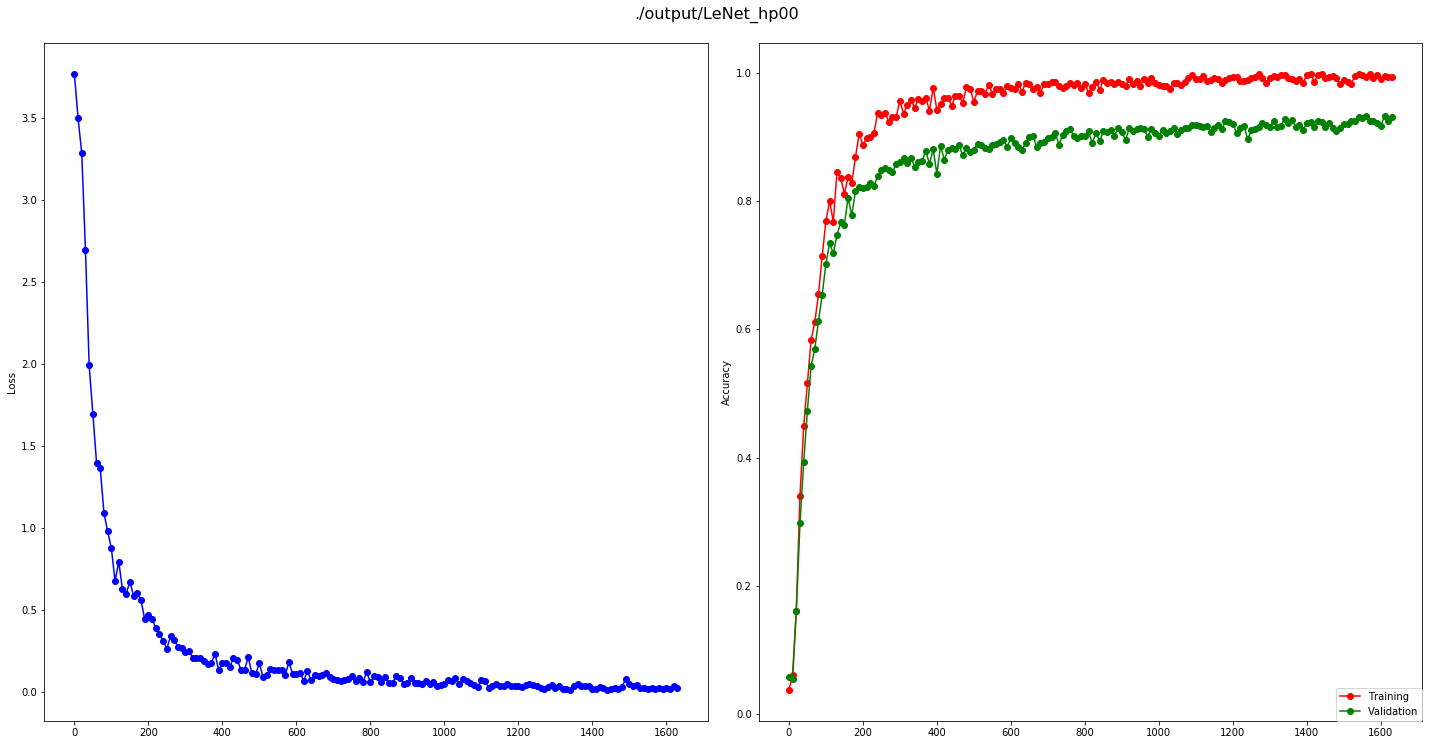

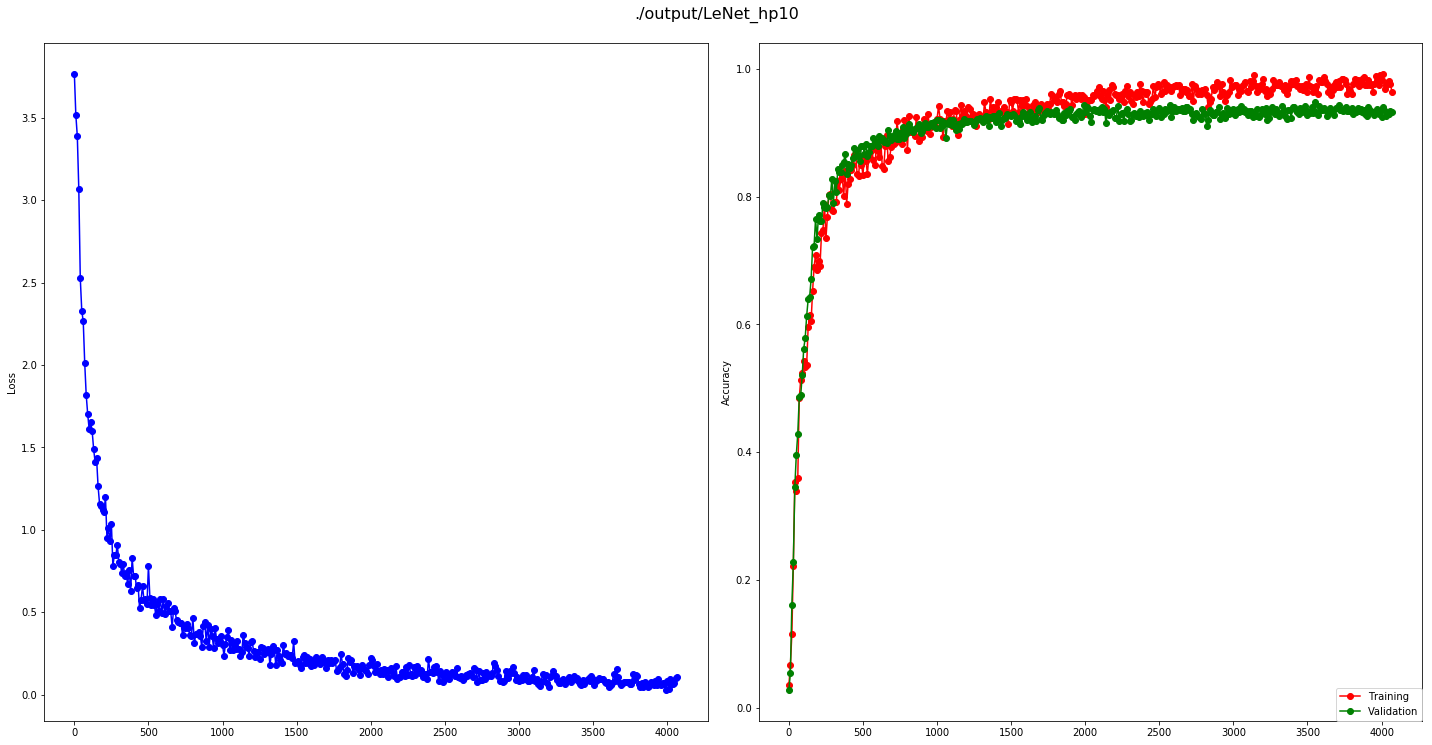

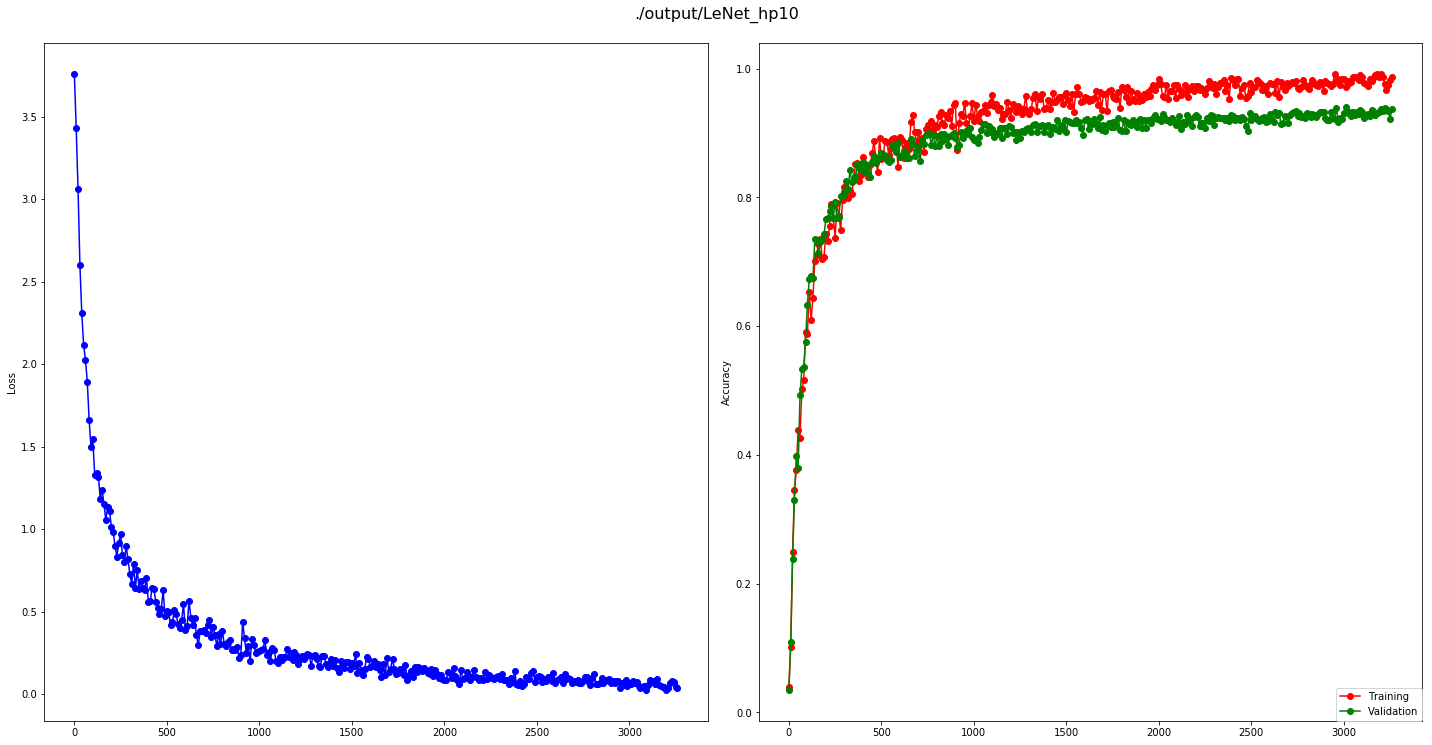

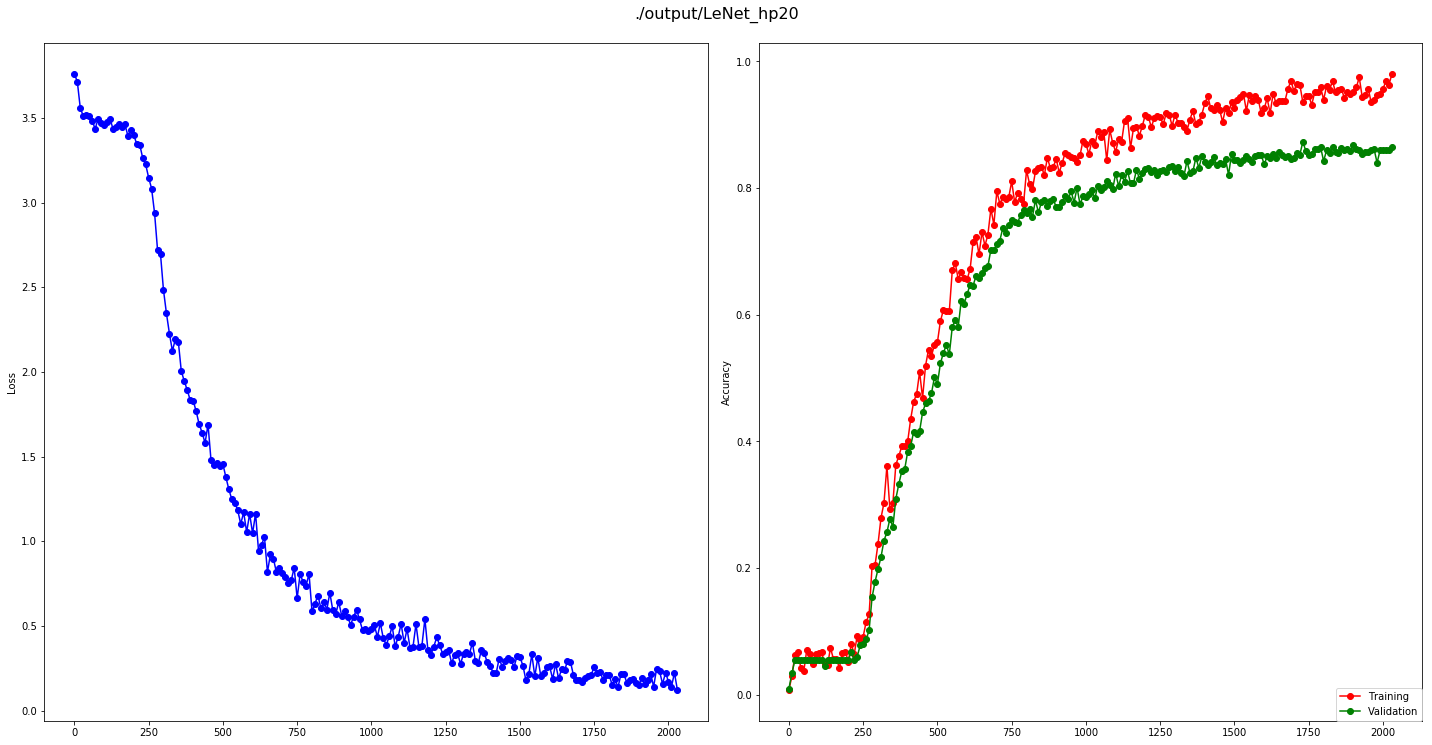

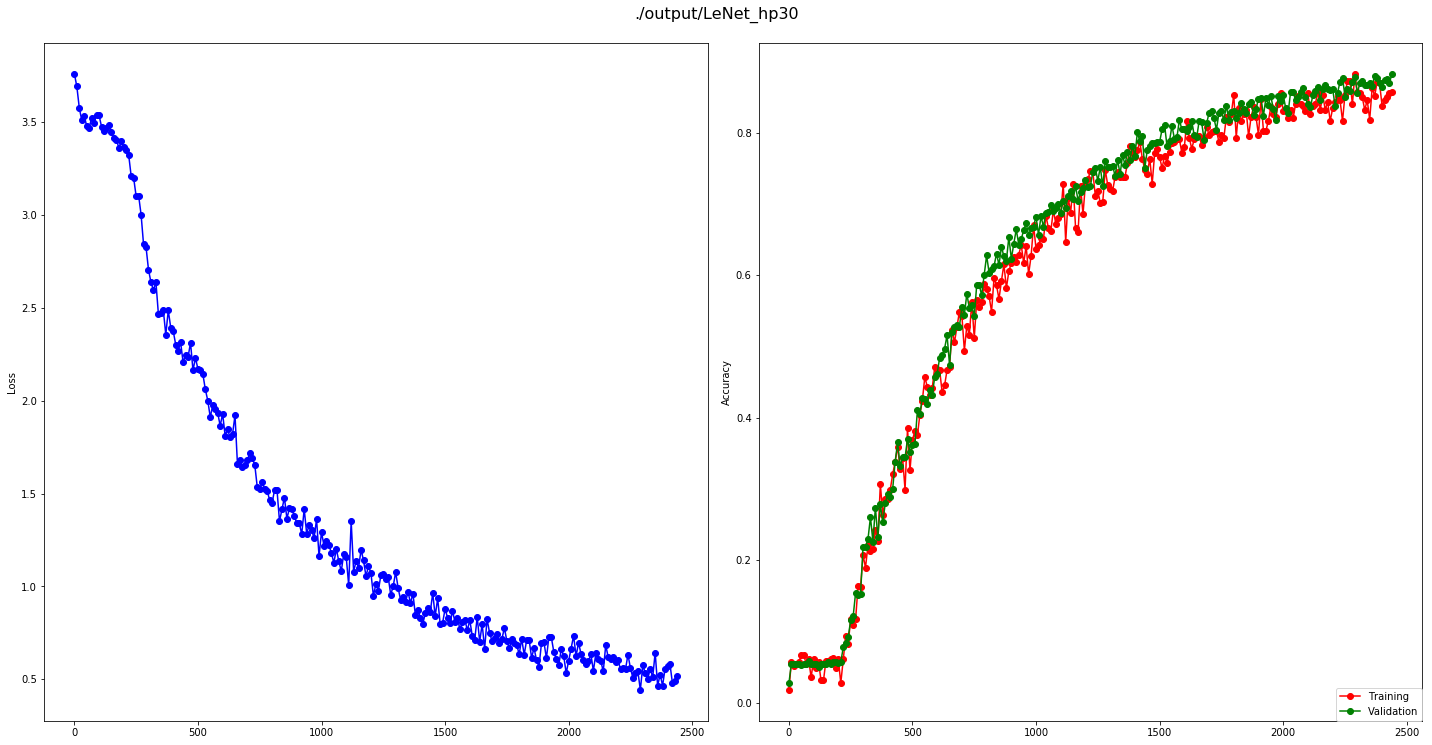

In [13]:
def build_train_accuracy_LeNet_fcts(
        X_train, y_train, X_valid, y_valid, X_test, y_test, 
        nb_ch,
        checkpoint_dir="./output/LeNet_hp0", 
        learning_rate=0.001, drop_out=0.7,
        batch_size=256, num_epochs=50,
        reuse=None):
    def train_LeNet():
        return train_model(checkpoint_dir, X_train, y_train, X_valid, y_valid, X_test, y_test, nb_ch, LeNet, learning_rate, drop_out, batch_size, num_epochs, reuse)

    def accuracy_LeNet():
        return model_accuracy(checkpoint_dir, X_test, y_test, nb_ch, LeNet, batch_size)
        
    return train_LeNet, accuracy_LeNet

BATCH_SIZE = 384
NUM_EPOCHS = 12

lenet_runtimes = [
    # acc = 0.9066512
    ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train, y_train, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp00", 0.001, None, 512, 30),
    
    # acc = 0.93
    ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train_augm, y_train_augm, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp10", 0.001, None, 512, 30),
    
    ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train_augm, y_train_augm, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp20", 0.001, None, 512, 30),
    ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train_WB, y_train, X_valid_WB, y_valid, X_test_WB, y_test, 1, "./output/LeNet_hp30", 0.001, None, 512, 30),
    ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train_augm_WB, y_train_augm, X_valid_WB, y_valid, X_test_WB, y_test, 1, "./output/LeNet_hp40", 0.001, None, 512, 18),

    # Reference for the base training set - with sigma=0.1
    # ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train, y_train, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp00", 0.0001, 0.9, 600, 30),
    
    # acc = 0.934
    # ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train, y_train, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp00", 0.001, None, 512, 30),
    # ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train_augm, y_train_augm, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp10", 0.001, None, 512, 30),
    
    #ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train, y_train, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp00", 0.0001, None, 600, 30),
    #ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train, y_train, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp02", 0.0001, 0.7, 600, 30),
    #ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train, y_train, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp02", 0.0001, 0.9, 600, 16),
    #ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train_WB, y_train, X_valid_WB, y_valid, X_test_WB, y_test, 1, "./output/LeNet_hp1", 0.0001, 0.9, 750, 16),
    #ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train_augm, y_train_augm, X_valid, y_valid, X_test, y_test, 3, "./output/LeNet_hp2", 0.0005, 0.9, 800, 18),
    #ModelRuntimeDef(build_train_accuracy_LeNet_fcts, X_train_augm_WB, y_train_augm, X_valid_WB, y_valid, X_test_WB, y_test, 1, "./output/LeNet_hp3", 0.0001, 0.9, 800, 18),
]

%time lenet_accuracies = play_runtimes(lenet_runtimes)

In [26]:
show_ordered_accuracies(lenet_accuracies)

Sorted Accuracies:
./output/LeNet_hp10: 0.925
./output/LeNet_hp00: 0.914
./output/LeNet_hp30: 0.859
./output/LeNet_hp20: 0.845


##### AlexNet (simplified): optimization of the hyperparameters

In [139]:
def build_train_accuracy_AlexNetSimplified_fcts(
        X_train, y_train, X_valid, y_valid, X_test, y_test, 
        nb_ch,
        checkpoint_dir="./output/AlexNetSimplified_hp0", 
        learning_rate=0.001, drop_out=0.7,
        batch_size=256, num_epochs=50,
        reuse=None):
    def train_AlexNetSimplified():
        return train_model(checkpoint_dir, X_train, y_train, X_valid, y_valid, X_test, y_test, nb_ch, AlexNetSimplified, learning_rate, drop_out, batch_size, num_epochs, reuse)

    def accuracy_AlexNetSimplified():
        return model_accuracy(checkpoint_dir, X_test, y_test, nb_ch, AlexNetSimplified, batch_size)
        
    return train_AlexNetSimplified, accuracy_AlexNetSimplified

alexnet_runtimes = [
    # ModelRuntimeDef(build_train_accuracy_AlexNetSimplified_fcts, X_train, y_train, X_valid, y_valid, X_test, y_test, 3, "./output/AlexNetSimplified_hp10", 0.001, None, 256, 26),
    # ModelRuntimeDef(build_train_accuracy_AlexNetSimplified_fcts, X_train_WB, y_train, X_valid_WB, y_valid, X_test_WB, y_test, 1, "./output/AlexNetSimplified_hp20", 0.001, None, 256, 26),
    ModelRuntimeDef(build_train_accuracy_AlexNetSimplified_fcts, X_train_augm, y_train_augm, X_valid, y_valid, X_test, y_test, 3, "./output/AlexNetSimplified_hp30", 0.001, None, 256, 26),
    # ModelRuntimeDef(build_train_accuracy_AlexNetSimplified_fcts, X_train_augm_WB, y_train_augm, X_valid_WB, y_valid, X_test_WB, y_test, 1, "./output/AlexNetSimplified_hp40", 0.001, None, 384, 26),
]

%time alexnet_accuracies = play_runtimes(alexnet_runtimes)

**** ./output/AlexNetSimplified_hp30 *****
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./output/AlexNetSimplified_hp30/AlexNetSimplified_256_model.
step 0, loss = 3.77, acc = 0.04/0.03 (20334.5 examples/sec; 0.013 sec/batch)
INFO:tensorflow:Saving checkpoints for 101 into ./output/AlexNetSimplified_hp30/AlexNetSimplified_256_model.
INFO:tensorflow:Saving checkpoints for 201 into ./output/AlexNetSimplified_hp30/AlexNetSimplified_256_model.
INFO:tensorflow:Saving checkpoints for 301 into ./output/AlexNetSimplified_hp30/AlexNetSimplified_256_model.
INFO:tensorflow:Saving checkpoints for 401 into ./output/AlexNetSimplified_hp30/AlexNetSimplified_256_model.
INFO:tensorflow:Saving checkpoints for 501 into ./output/AlexNetSimplified_hp30/AlexNetSimplified_256_model.
INFO:tensorflow:Saving checkpoints for 601 into ./output/AlexNetSimplified_hp30/AlexNetSimplified_256_model.
INFO:tensorflow:Saving checkpoints for 701 into ./output/AlexNetSimplified_

ValueError: Variable conv1/weights already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-6-5b34b4e31c31>", line 5, in _build_variable
    return tf.get_variable(name, shape, initializer=initializer, dtype=tf.float32)
  File "<ipython-input-6-5b34b4e31c31>", line 9, in _variable_with_regul_term
    var = _build_variable(name, shape, tf.truncated_normal_initializer(stddev=stddev, dtype=dtype))
  File "<ipython-input-6-5b34b4e31c31>", line 17, in conv_relu
    weights = _variable_with_regul_term("weights", kernel_shape, stddev=stddev, wd=wd)


In [140]:
show_ordered_accuracies(alexnet_accuracies)

Sorted Accuracies:
./output/AlexNetSimplified_hp30: 0.952
./output/AlexNetSimplified_hp10: 0.948
./output/AlexNetSimplified_hp40: 0.935
./output/AlexNetSimplified_hp20: 0.910


##### LeNet superloaded: optimization of the hyperparameters

**** ./output/LeNetSuperloaded_hp10 *****
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./output/LeNetSuperloaded_hp10/LeNetSuperloaded_256_model.
step 0, loss = 3.76, acc = 0.04/0.05 (312.7 examples/sec; 0.819 sec/batch)
step 10, loss = 3.75, acc = 0.05/0.05 (731.1 examples/sec; 0.350 sec/batch)
step 20, loss = 3.55, acc = 0.07/0.05 (711.5 examples/sec; 0.360 sec/batch)
step 30, loss = 3.56, acc = 0.04/0.05 (723.0 examples/sec; 0.354 sec/batch)
step 40, loss = 3.42, acc = 0.05/0.05 (750.8 examples/sec; 0.341 sec/batch)
step 50, loss = 3.45, acc = 0.10/0.10 (741.5 examples/sec; 0.345 sec/batch)
step 60, loss = 3.14, acc = 0.11/0.10 (720.5 examples/sec; 0.355 sec/batch)
step 70, loss = 2.84, acc = 0.15/0.13 (691.9 examples/sec; 0.370 sec/batch)
step 80, loss = 2.66, acc = 0.20/0.19 (683.9 examples/sec; 0.374 sec/batch)
step 90, loss = 2.46, acc = 0.26/0.29 (691.5 examples/sec; 0.370 sec/batch)
INFO:tensorflow:Saving checkpoints for 101 into ./

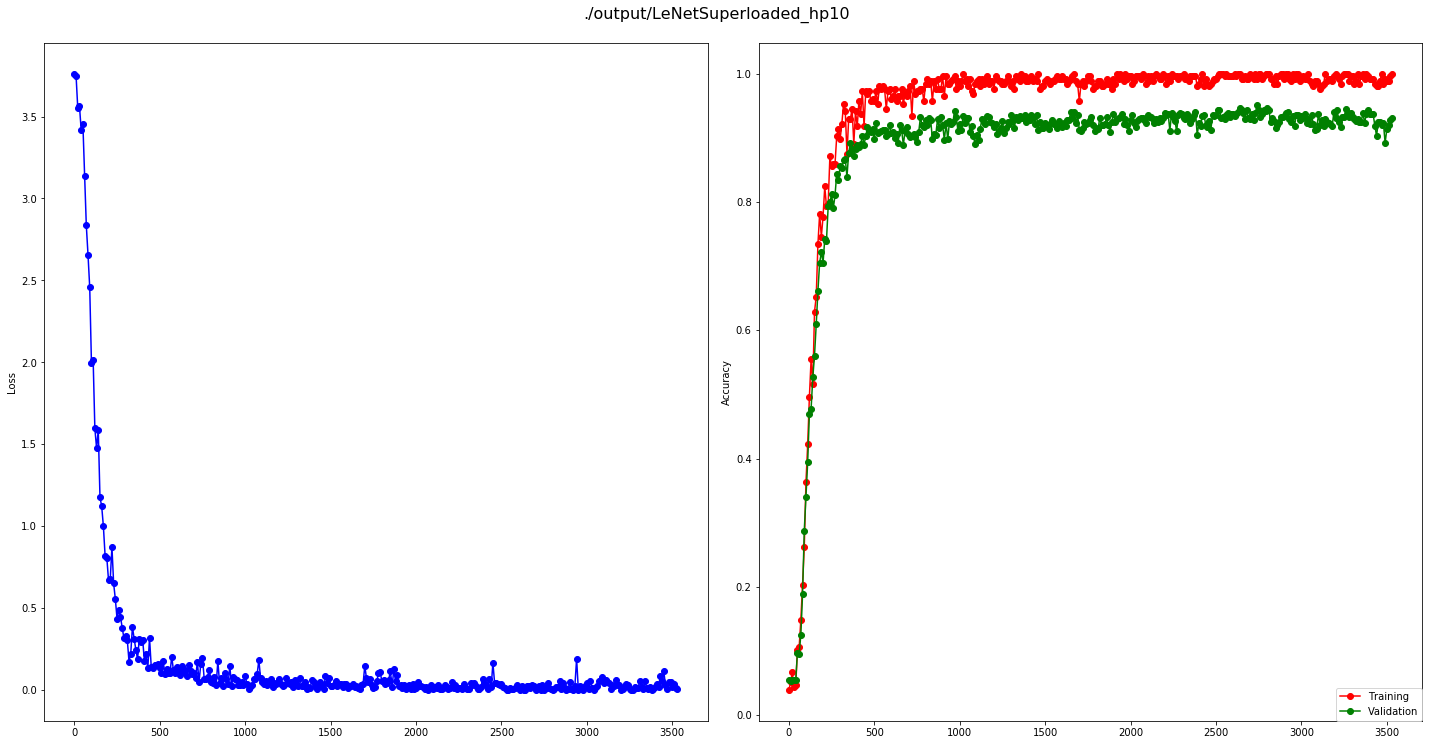

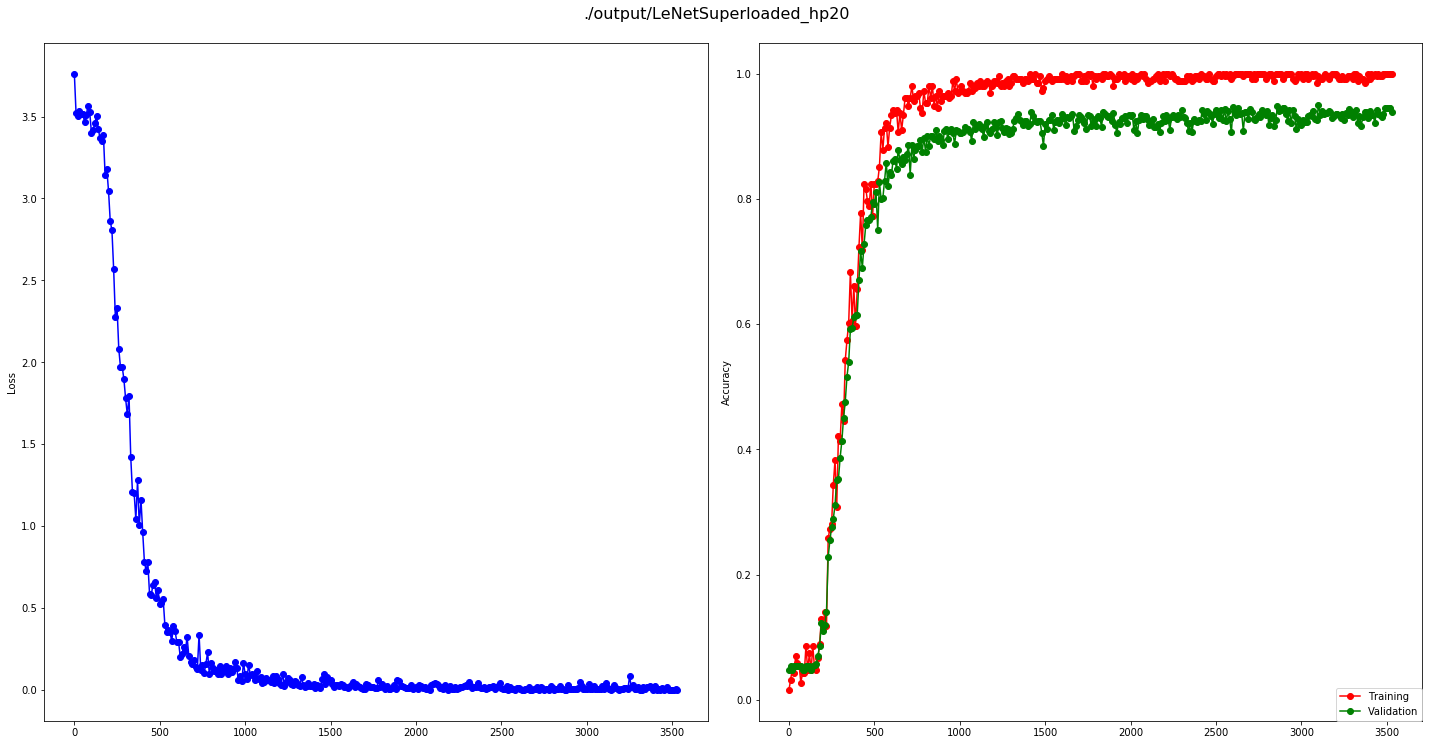

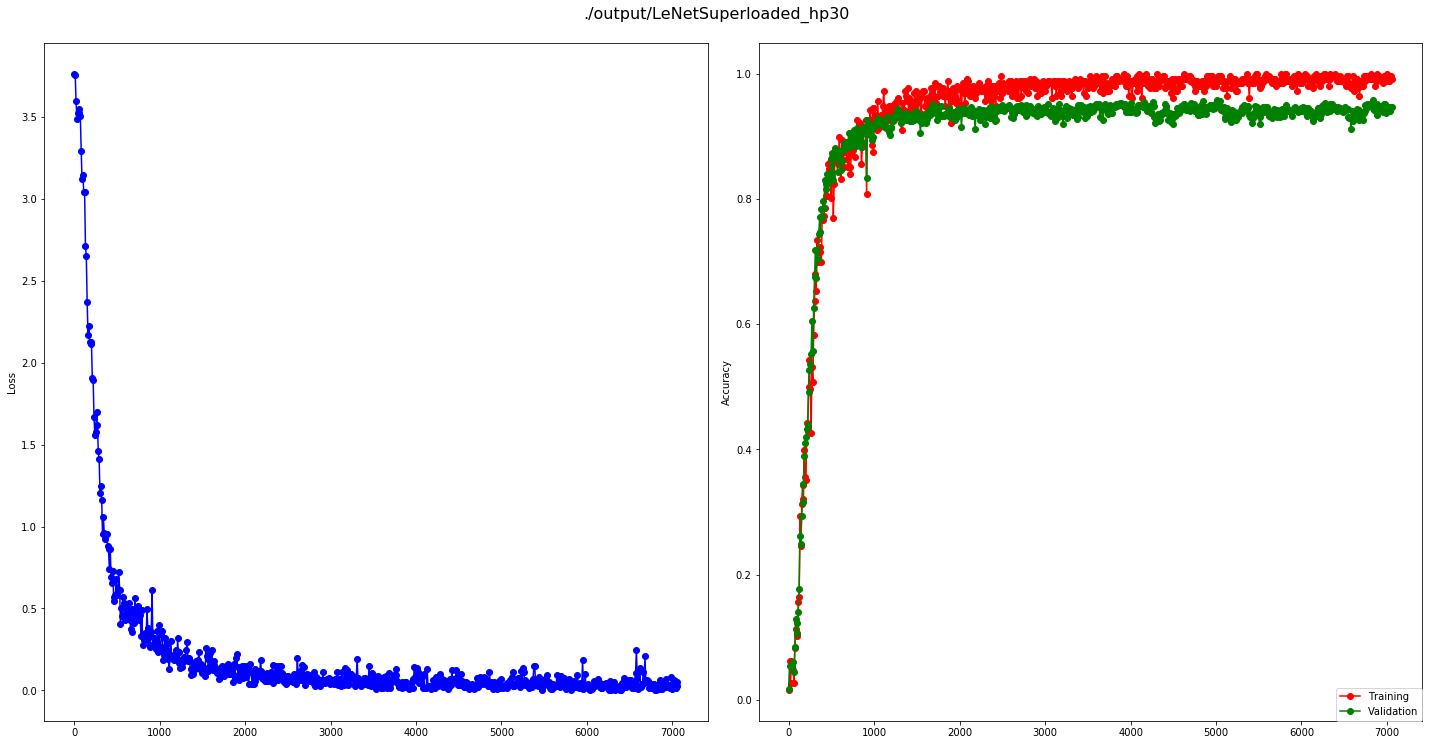

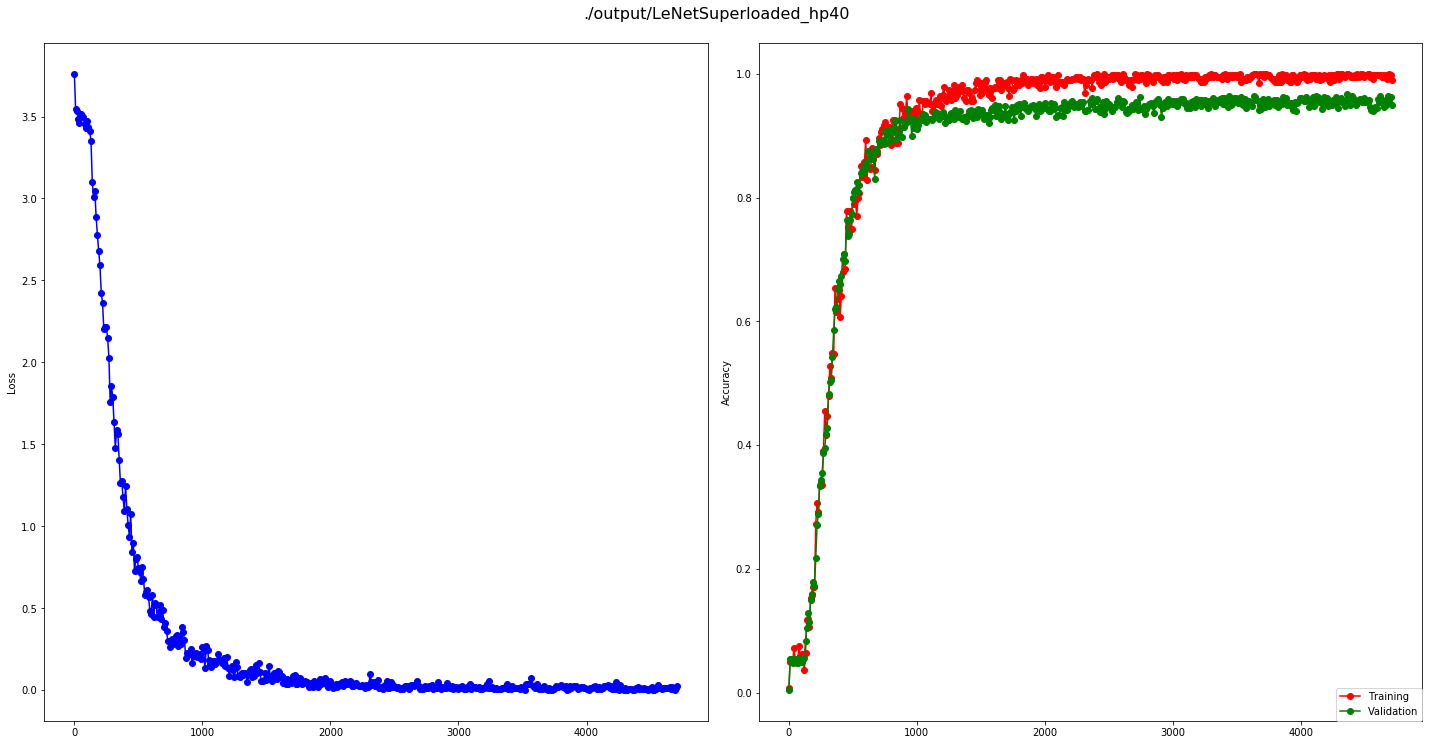

In [27]:
def build_train_accuracy_LeNetSuperloaded_fcts(
        X_train, y_train, X_valid, y_valid, X_test, y_test, 
        nb_ch,
        checkpoint_dir="./output/LeNetSuperloaded_hp0", 
        learning_rate=0.001, drop_out=0.7,
        batch_size=256, num_epochs=50,
        reuse=None):
    def train_LeNetSuperloaded():
        return train_model(checkpoint_dir, X_train, y_train, X_valid, y_valid, X_test, y_test, nb_ch, LeNetSuperloaded, learning_rate, drop_out, batch_size, num_epochs, reuse)

    def accuracy_LeNetSuperloaded():
        return model_accuracy(checkpoint_dir, X_test, y_test, nb_ch, LeNetSuperloaded, batch_size)
        
    return train_LeNetSuperloaded, accuracy_LeNetSuperloaded

lenetsuperloaded_runtimes = [
    ModelRuntimeDef(build_train_accuracy_LeNetSuperloaded_fcts, X_train, y_train, X_valid, y_valid, X_test, y_test, 3, "./output/LeNetSuperloaded_hp10", 0.001, None, 256, 26),
    ModelRuntimeDef(build_train_accuracy_LeNetSuperloaded_fcts, X_train_WB, y_train, X_valid_WB, y_valid, X_test_WB, y_test, 1, "./output/LeNetSuperloaded_hp20", 0.001, None, 256, 26),
    ModelRuntimeDef(build_train_accuracy_LeNetSuperloaded_fcts, X_train_augm, y_train_augm, X_valid, y_valid, X_test, y_test, 3, "./output/LeNetSuperloaded_hp30", 0.001, None, 256, 26),
    ModelRuntimeDef(build_train_accuracy_LeNetSuperloaded_fcts, X_train_augm_WB, y_train_augm, X_valid_WB, y_valid, X_test_WB, y_test, 1, "./output/LeNetSuperloaded_hp40", 0.001, None, 384, 26),
]

%time lenetsuperloaded_accuracies = play_runtimes(lenetsuperloaded_runtimes)

In [28]:
show_ordered_accuracies(lenetsuperloaded_accuracies)

Sorted Accuracies:
./output/LeNetSuperloaded_hp40: 0.944
./output/LeNetSuperloaded_hp30: 0.933
./output/LeNetSuperloaded_hp20: 0.924
./output/LeNetSuperloaded_hp10: 0.922


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

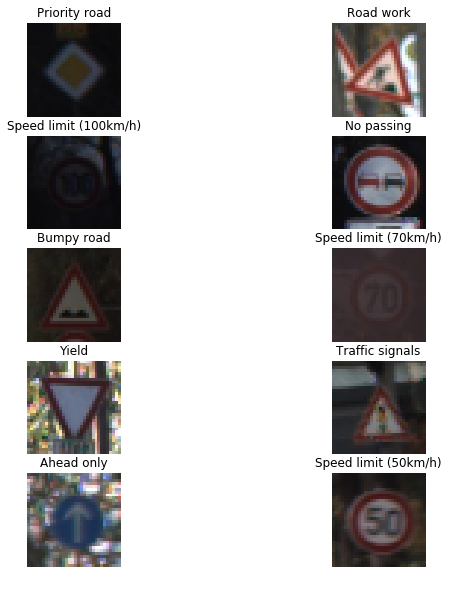

In [147]:
### Load the images and plot them here.
import os
import re
import matplotlib.image as mpimg

# The index of the sign name is in its name.
def get_signnames_index(filename):
    split = filename.split('_', 1)
    split = split[1].split('.', 1)
    return int(split[0])
    
X_test_new_imgs, y_test_new_imgs = [], []

fig = plt.figure(figsize=(10,10))
count = 1

for file in os.listdir("./output/"):
    if not file.startswith('image_'):
        continue

    filename = "./output/%s" % (file)
    signnames_index = get_signnames_index(filename)
    
    image = mpimg.imread(filename, format='png')
    image = image[:,:,0:3]
    image = (image * 255).round().astype(np.uint8)
    
    X_test_new_imgs.append(image)
    y_test_new_imgs.append(signnames_index)
    
    a = fig.add_subplot(5, 2, count)
    a.set_title(signnames[signnames_index])
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    count += 1

### Predict the Sign Type for Each Image

In [148]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def predict(X, neural_network_fct, reuse=True, nb_ch=3, keep_prob=None):
    # Define the pipeline for the validation/test
    X_ph = tf.placeholder(tf.float32, (None, 32, 32, None))
    logits = neural_network_fct(X_ph, reuse=reuse, nb_ch=nb_ch, keep_prob=keep_prob)
    return tf.argmax(logits, 1), { X_ph: X }

def compare_prediction_actual(X, y, neural_network_fct, model_checkpoint_dir):
    predict_op, feed_dict_predict = predict(X, neural_network_fct)

    saver = tf.train.Saver()
    
    ckpt = tf.train.get_checkpoint_state(model_checkpoint_dir)
    
    with tf.Session() as sess:
        save_path = ckpt.model_checkpoint_path
        saver.restore(sess, save_path)
        
        predictions = sess.run(predict_op, feed_dict=feed_dict_predict)
    
    for i in range(len(X)):
        if y[i] == predictions[i]:
            print('image %s: prediction OK (%s)' % (i, signnames[y[i]]))
        else:
            print('image %s: prediction KO - pred: %s, actual: %s' % (i, signnames[predictions[i]], signnames[y[i]]) )
    
# We take here the model having the best accuracy on the test data set.
compare_prediction_actual(X_test_new_imgs, y_test_new_imgs, AlexNetSimplified, './output/AlexNetSimplified_hp30')


image 0: prediction OK (Priority road)
image 1: prediction OK (Road work)
image 2: prediction OK (Speed limit (100km/h))
image 3: prediction OK (No passing)
image 4: prediction OK (Bumpy road)
image 5: prediction OK (Speed limit (70km/h))
image 6: prediction OK (Yield)
image 7: prediction OK (Traffic signals)
image 8: prediction OK (Ahead only)
image 9: prediction OK (Speed limit (50km/h))


### Analyze Performance

In [149]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

acc_new_test_imgs = model_accuracy('./output/AlexNetSimplified_hp30', X_test_new_imgs, y_test_new_imgs, 3, AlexNetSimplified, 1, reuse=True)

print('The accuracy on the new images test data set is %.2f %%' % (np.asscalar(acc_new_test_imgs*100.)))


Test Accuracy = 1.000
The accuracy on the new images test data set is 100.00 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [150]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def predict_probabilities(X, neural_network_fct, reuse=True, nb_ch=3, keep_prob=None):
    # Define the pipeline for the validation/test
    X_ph = tf.placeholder(tf.float32, (None, 32, 32, None))
    logits = neural_network_fct(X_ph, reuse=reuse, nb_ch=nb_ch, keep_prob=keep_prob)
    return tf.nn.softmax(logits), { X_ph: X }
    

def compare_prediction_prob_actual(X, neural_network_fct, model_checkpoint_dir):
    predict_prob_op, feed_dict_predict_prob = predict_probabilities(X, neural_network_fct)
    predict_prob_op = tf.nn.top_k(predict_prob_op, k=3)

    saver = tf.train.Saver()
    
    ckpt = tf.train.get_checkpoint_state(model_checkpoint_dir)
    
    with tf.Session() as sess:
        save_path = ckpt.model_checkpoint_path
        saver.restore(sess, save_path)
        
        predictions = sess.run(predict_prob_op, feed_dict=feed_dict_predict_prob)
    
    print(predictions)
    
# We take here the model having the best accuracy on the test data set.
compare_prediction_prob_actual(X_test_new_imgs, AlexNetSimplified, './output/AlexNetSimplified_hp30')

TopKV2(values=array([[  1.00000000e+00,   4.52074420e-11,   3.02457647e-12],
       [  9.56167340e-01,   3.38870883e-02,   4.52214852e-03],
       [  9.46714580e-01,   5.26659973e-02,   3.50245129e-04],
       [  9.99956131e-01,   3.96996329e-05,   4.04811453e-06],
       [  9.99993682e-01,   1.91571394e-06,   1.62196125e-06],
       [  9.99441683e-01,   4.96706052e-04,   2.13621952e-05],
       [  9.99885082e-01,   5.67721872e-05,   1.93275027e-05],
       [  9.99982715e-01,   1.54050031e-05,   1.41330736e-06],
       [  9.99583423e-01,   2.14343789e-04,   7.81519411e-05],
       [  9.99999762e-01,   1.10154318e-07,   7.37117531e-08]], dtype=float32), indices=array([[12, 17, 10],
       [25, 24, 30],
       [ 7,  8,  5],
       [ 9, 10, 15],
       [22, 23, 26],
       [ 4,  8,  0],
       [13, 15, 12],
       [26, 18,  4],
       [35, 34, 37],
       [ 2,  5,  1]], dtype=int32))


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


(1, 32, 32, 64)
(1, 32, 32, 64)


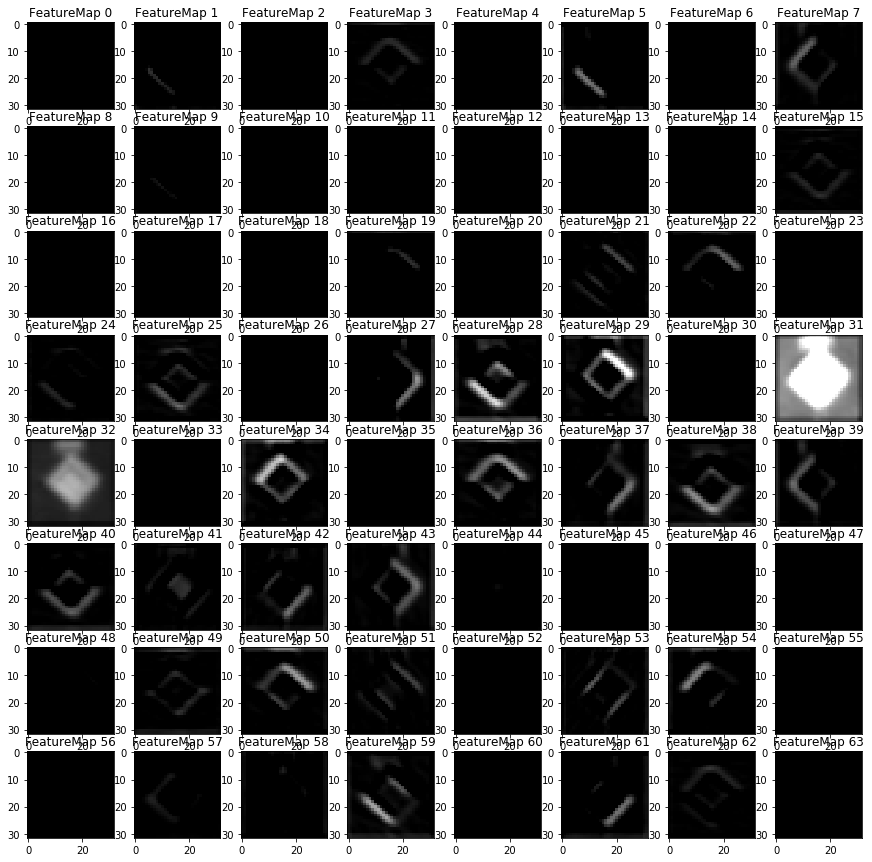

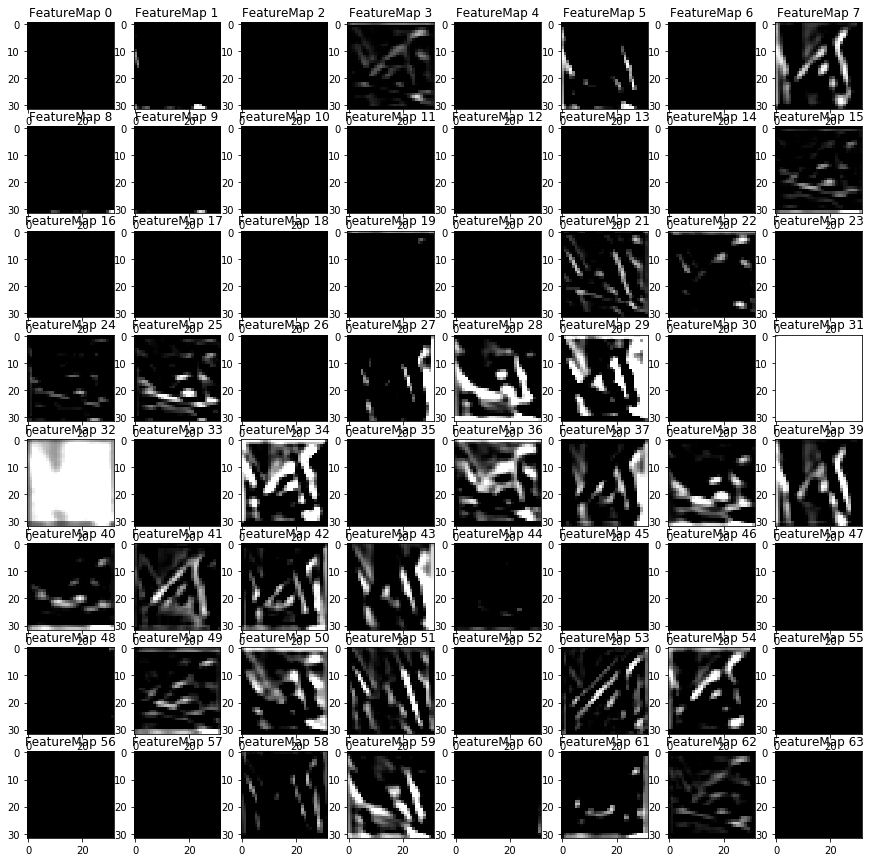

In [200]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.
def get_activation_AlexNetSimplified(input_queue, reuse=None, nb_ch=3, keep_prob=None, num_classes=43):
    sigma_co=0.01  #5e-2
    sigma_fc=0.001 #0.04
    
    with tf.variable_scope('conv1', reuse=reuse) as scope:
        return conv_relu(input_queue, [5, 5, nb_ch, 64], [64], stddev=sigma_co)

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input })
    print(activation.shape)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(8, 8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

x = tf.placeholder(tf.float32, (None, 32, 32, None))
tf_activation = get_activation_AlexNetSimplified(x, reuse=True)

saver = tf.train.Saver()
ckpt = tf.train.get_checkpoint_state('./output/AlexNetSimplified_hp30')    
with tf.Session() as sess:
    save_path = ckpt.model_checkpoint_path
    saver.restore(sess, save_path)
    
    outputFeatureMap([X_test_new_imgs[0],] , tf_activation, activation_min=0, activation_max=128)
    outputFeatureMap([X_test_new_imgs[1],] , tf_activation, activation_min=0, activation_max=128, plt_num=2)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 